## Drosophila Examples for Pairwise Alignment

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import sys
sys.path.insert(0,'../')
import morpho
import matplotlib.pyplot as plt
import scanpy
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme="onedork")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
%load_ext autoreload
%autoreload 2

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
data_dir='../data/drosophila_data'
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E7-9h_cellbin_tdr_v2.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E9-10h_cellbin_tdr_v1.h5ad'))

In [24]:
slice_A

AnnData object with n_obs × n_vars = 31353 × 9502
    obs: 'area', 'slices', 'Annotation_1_cell_type', 'Annotation_2_tissue', 'Annotation_3_germ_layer', 'actual_time'
    uns: '__type'
    obsm: 'X_pca', 'X_umap', 'align_spatial', 'bbox', 'contour', 'spatial', 'tdr_spatial'
    layers: 'counts_X'

In [26]:
data_dir='../data/cellbin_3D'
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E7-8h_cellbin_v1.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E8-9h_cellbin_v1.h5ad'))

In [5]:
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E8-9h_cellbin_v1.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E9-10h_cellbin_v1.h5ad'))

In [6]:
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E9-10h_cellbin_v1.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E13-14h_cellbin_v1.h5ad'))

In [7]:
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E13-14h_cellbin_v1.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E15-16h_cellbin_v1.h5ad'))

In [8]:
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E15-16h_cellbin_v1.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E16-17h_cellbin_v1.h5ad'))

In [27]:
sub_num = 10000
slice_A_sub = slice_A[np.random.choice(range(slice_A.shape[0]),sub_num)]
slice_B_sub = slice_B[np.random.choice(range(slice_B.shape[0]),sub_num)]

In [28]:
align_model_A, align_model_B, P, vecfld= morpho.morpho_align_pairwise(
            model_ref=slice_B_sub,
            model=slice_A_sub,
            spatial_key="tdr_spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=False,
            dissimilarity='kl',
            mode="SN",
            device="1",
            max_iter=100,
            dtype='float64',
            beta2=0.1,
            verbose=True,
            iter_key_added='iter_spatial',
            keep_size=False,
            layer='counts_X',
        )

|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 6615 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 137.60216084752443.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [7.6967s]
tensor(0.9900, device='cuda:0', dtype=torch.float64)


In [29]:
target_velocities = morpho.velocities(
    vecfld=vecfld, 
    quary_points=slice_B_sub.obsm['tdr_spatial'],
    device="1",
    dtype='float64',
)

In [30]:
target_velocities

array([[-0.01323334,  0.09961047, -0.00202332],
       [-0.01803997, -0.26783557, -0.20326632],
       [-0.02805222, -0.22921939, -0.46017716],
       ...,
       [-0.00417836,  0.26591336,  0.34625334],
       [-0.00852134,  0.29946023,  0.25528469],
       [-0.00367053,  0.28894297,  0.35815619]])

In [31]:
jacobian = morpho.jacobian(
    vecfld=vecfld, 
    quary_points=slice_B_sub.obsm['tdr_spatial'],
    device="1",
    dtype='float64',
)

In [32]:
jacobian

array([[[ 0.07197105,  0.11948268,  0.19104329, ...,  0.06330892,
          0.05093066,  0.06475891],
        [-1.01408251, -0.99668339, -1.00463758, ..., -0.99438852,
         -0.98401425, -0.9964039 ],
        [-0.04536663, -0.08092364, -0.03397341, ..., -0.05717316,
         -0.047238  , -0.05685056]],

       [[ 0.79130613,  1.34877061,  1.66609575, ...,  1.72208008,
          1.69393424,  1.85646218],
        [ 0.20320381,  0.11868416,  0.05063757, ...,  0.03807167,
         -0.25207474,  0.14389167],
        [-0.23976952, -0.45220175,  0.07263724, ..., -0.23237145,
         -0.53702851, -0.28153543]],

       [[ 0.05573045,  0.52018878,  1.90933078, ...,  1.34516999,
          0.87860567,  1.45001574],
        [-0.02374524,  0.00429551, -0.09846898, ..., -0.09347702,
         -0.31855726,  0.04149512],
        [ 0.83290813,  0.58741014,  1.25374135, ...,  0.70739509,
          0.4900946 ,  0.65359828]]])

In [33]:
acc, acc_mat = morpho.acceleration(
    vecfld=vecfld, 
    quary_points=slice_B_sub.obsm['tdr_spatial'],
    device="1",
    dtype='float64',
)

In [34]:
acc_mat

array([0.10250058, 0.31186712, 0.66020619, ..., 0.36460178, 0.38259857,
       0.39686745])

In [35]:
curv, cur_mat = morpho.curvature(
    vecfld=vecfld, 
    quary_points=slice_B_sub.obsm['tdr_spatial'],
    device="1",
    dtype='float64',
    formula=2,
)

|-----> [Calculating curvature] in progress: 100.0000%
|-----> [Calculating curvature] finished [0.2484s]


In [56]:
curv.shape

(10000,)

In [36]:
curl = morpho.curl(
    vecfld=vecfld, 
    quary_points=slice_B_sub.obsm['tdr_spatial'],
    device="1",
    dtype='float64',
)

In [37]:
curl.shape

(3, 10000)

In [38]:
div = morpho.divergence(
    vecfld=vecfld, 
    quary_points=slice_B_sub.obsm['tdr_spatial'],
    device="1",
    dtype='float64',
)

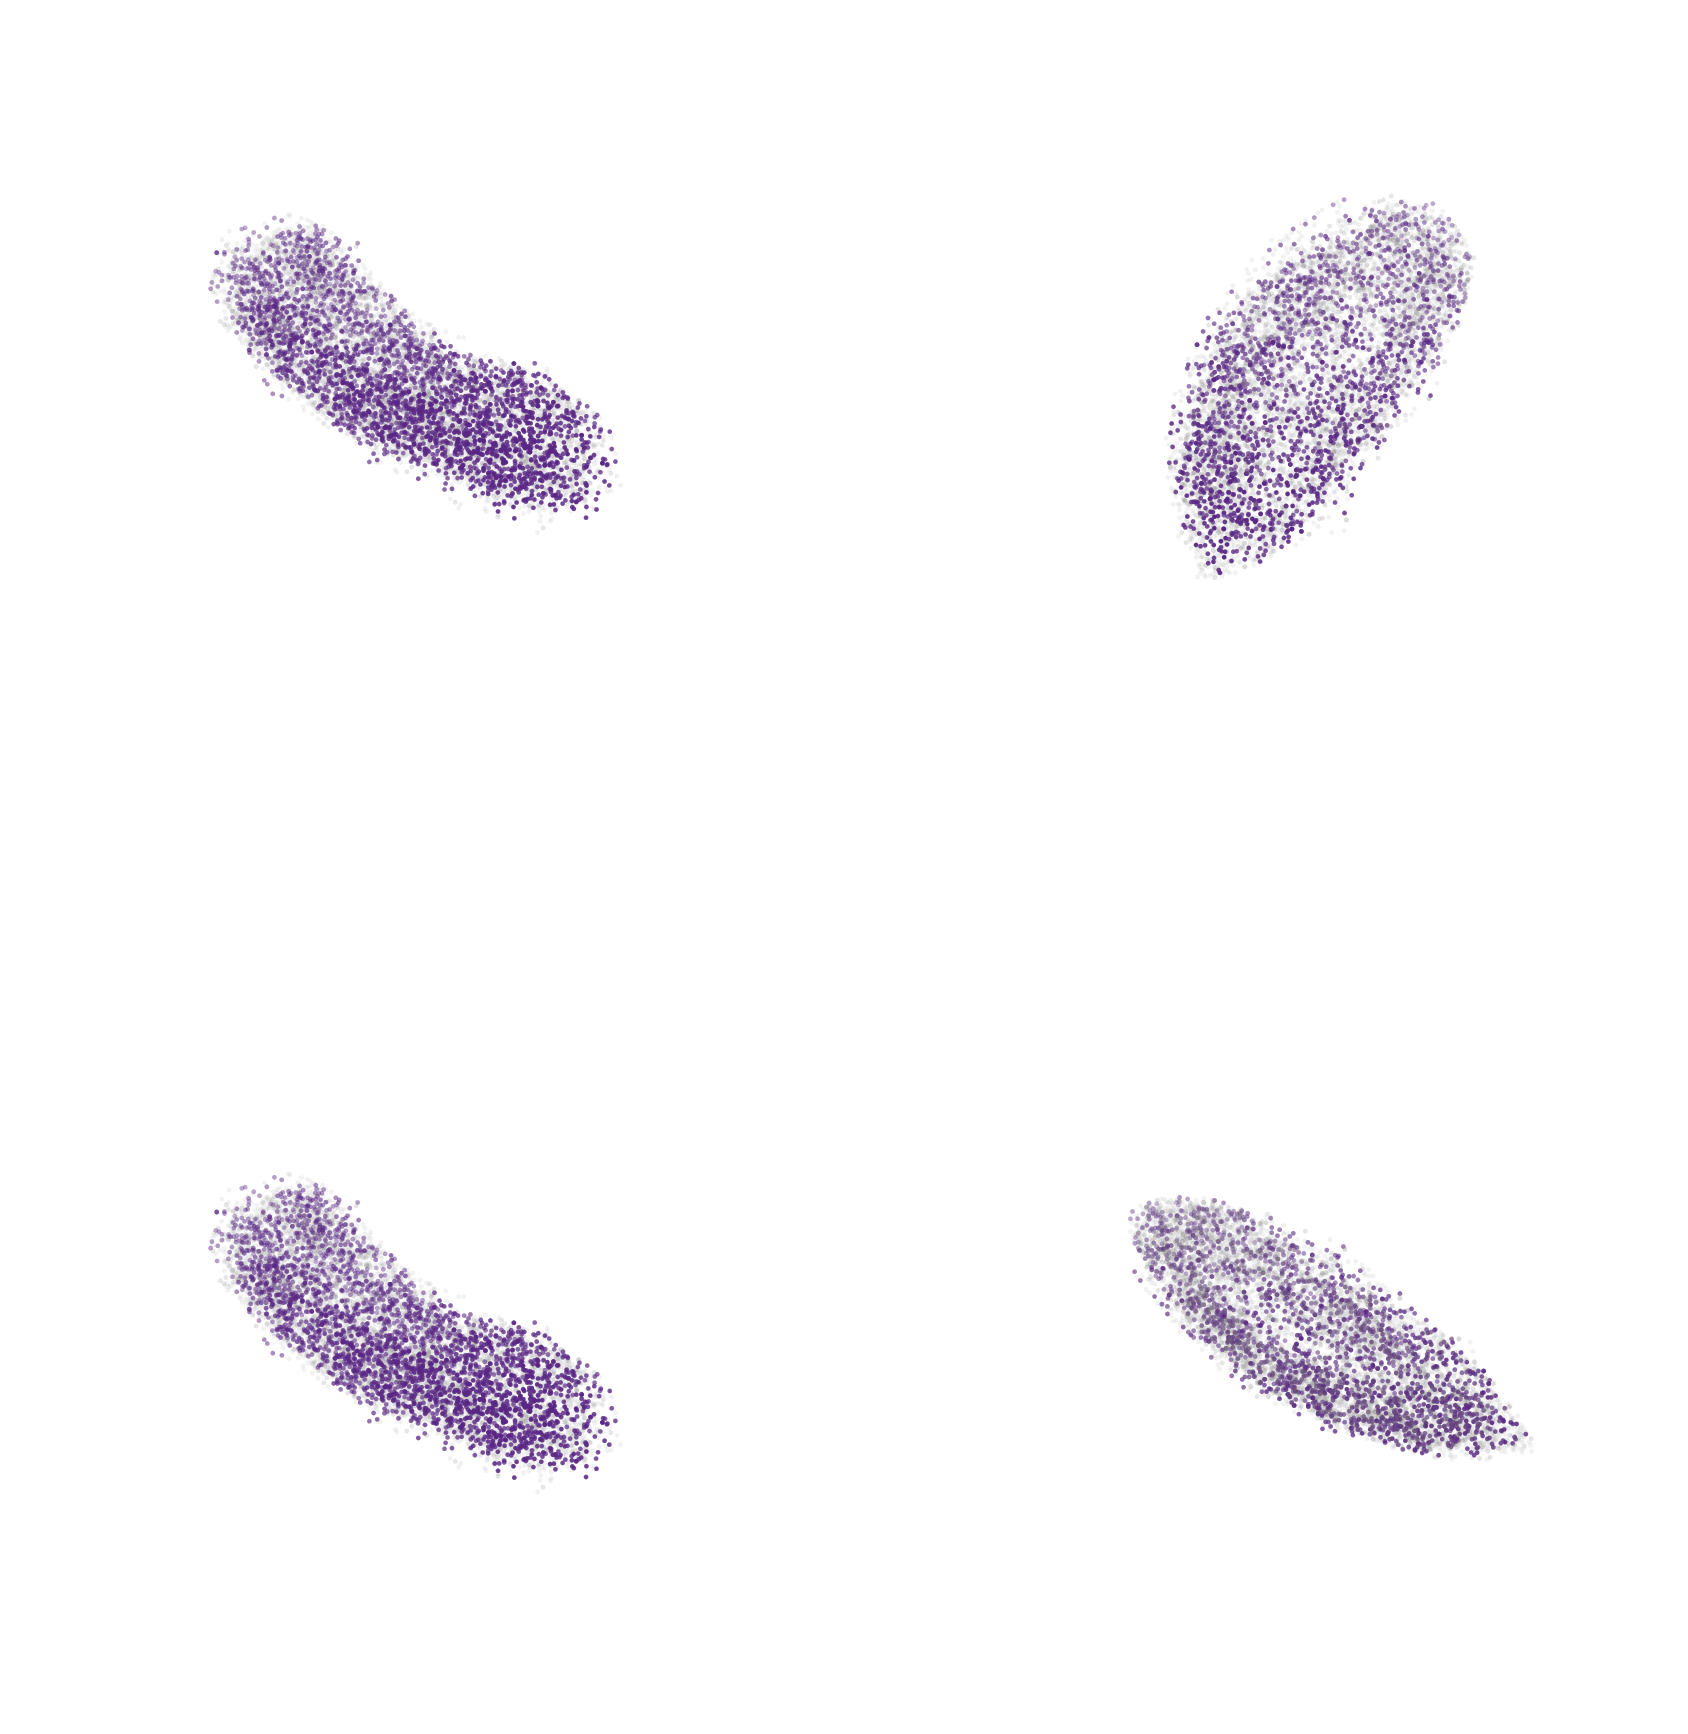

In [39]:
# %matplotlib widget
%matplotlib inline
spatial_key="tdr_spatial"
key_added="align_spatial"
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = 60
azim = -60
s = 20
xmin, xmax = -250,250
ymin,ymax = -250,250
zmin,zmax = -250,250
cell_type_layer = 'Annotation_2_tissue'
# cell_type_layer = 'anno_tissue'
cell_type_plot=slice_A_sub.obs[cell_type_layer].cat.categories[0]
fig = plt.figure(figsize=(30,50),facecolor='white')
ax = fig.add_subplot(3,2,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,2,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')

ax = fig.add_subplot(3,2,3,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,4,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')


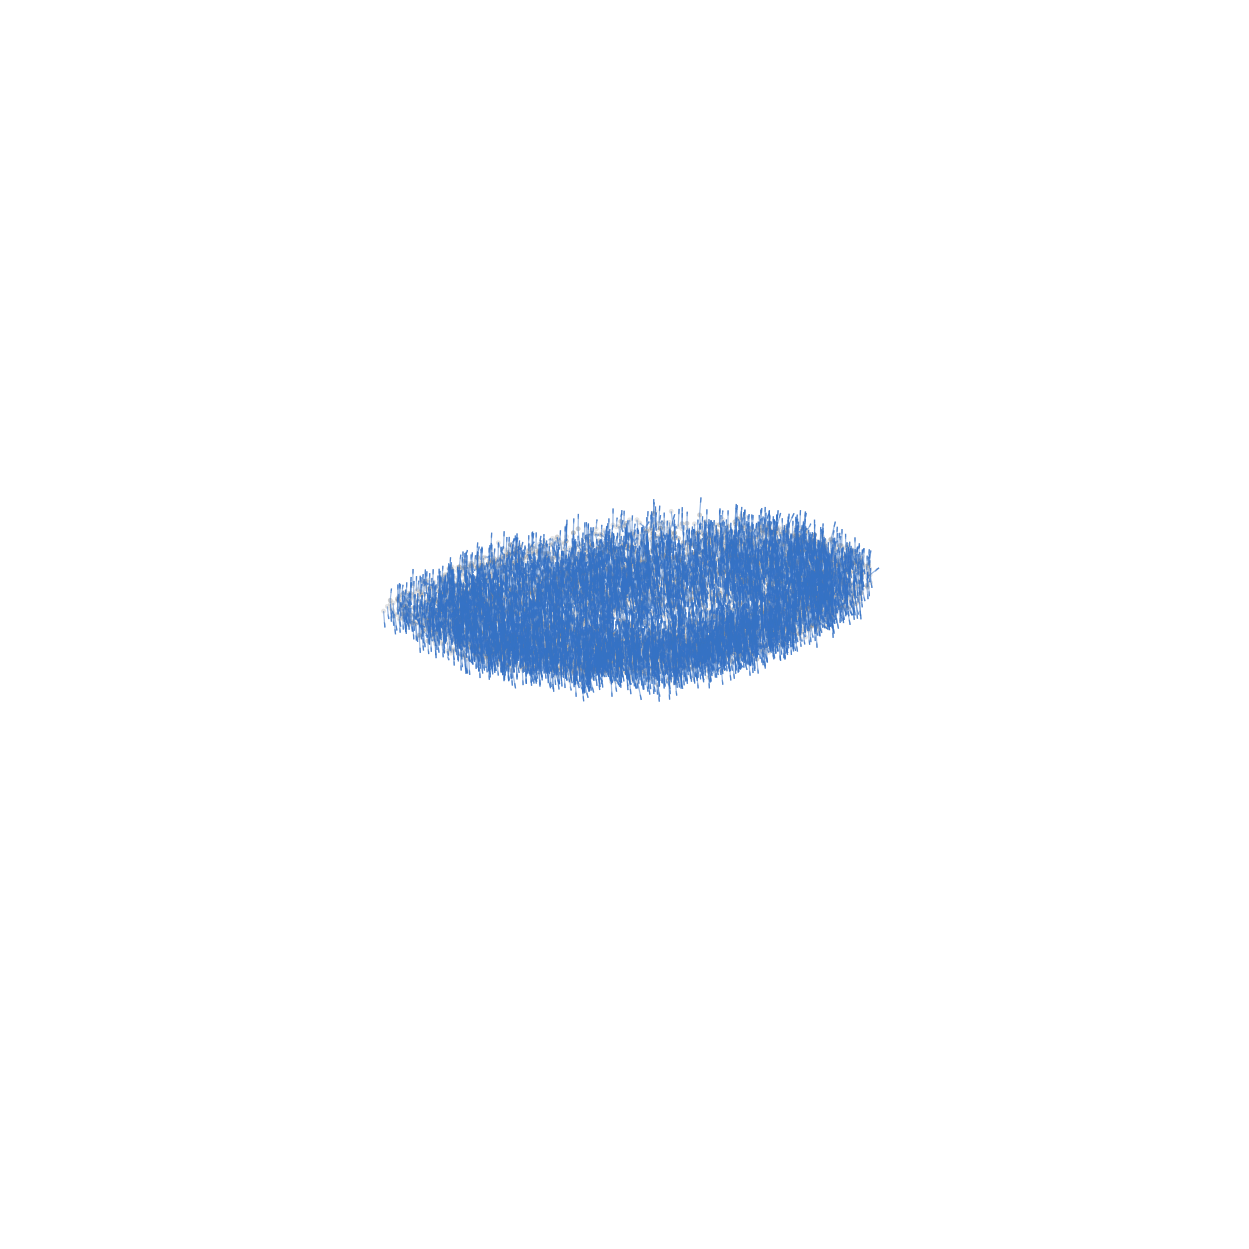

: 

In [65]:
# %matplotlib widget
%matplotlib inline
spatial_key="tdr_spatial"
key_added="align_spatial"
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = -60
azim = 90
s = 20
limit = 400
xmin, xmax = -limit,limit
ymin,ymax = -limit,limit
zmin,zmax = -limit,limit
obj = acc_mat
# cell_type_plot=slice_A_sub.obs['Annotation_2_tissue'].cat.categories[0]
# cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(30,50),facecolor='white')
ax = fig.add_subplot(2,1,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
ax.scatter(align_model_B.obsm[key_added][:,0],align_model_B.obsm[key_added][:,1],align_model_B.obsm[key_added][:,2],alpha=0.2,color=[0.5,0.5,0.5])
qu = ax.quiver(align_model_B.obsm[key_added][:,0],align_model_B.obsm[key_added][:,1],align_model_B.obsm[key_added][:,2],target_velocities[:,0],target_velocities[:,1],target_velocities[:,2],length = 20, normalize=True,alpha=0.5,color='b')
# qu.set_array(obj)
# for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
#     if cell_type == cell_type_plot:
#         ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
#     else:
#         ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')


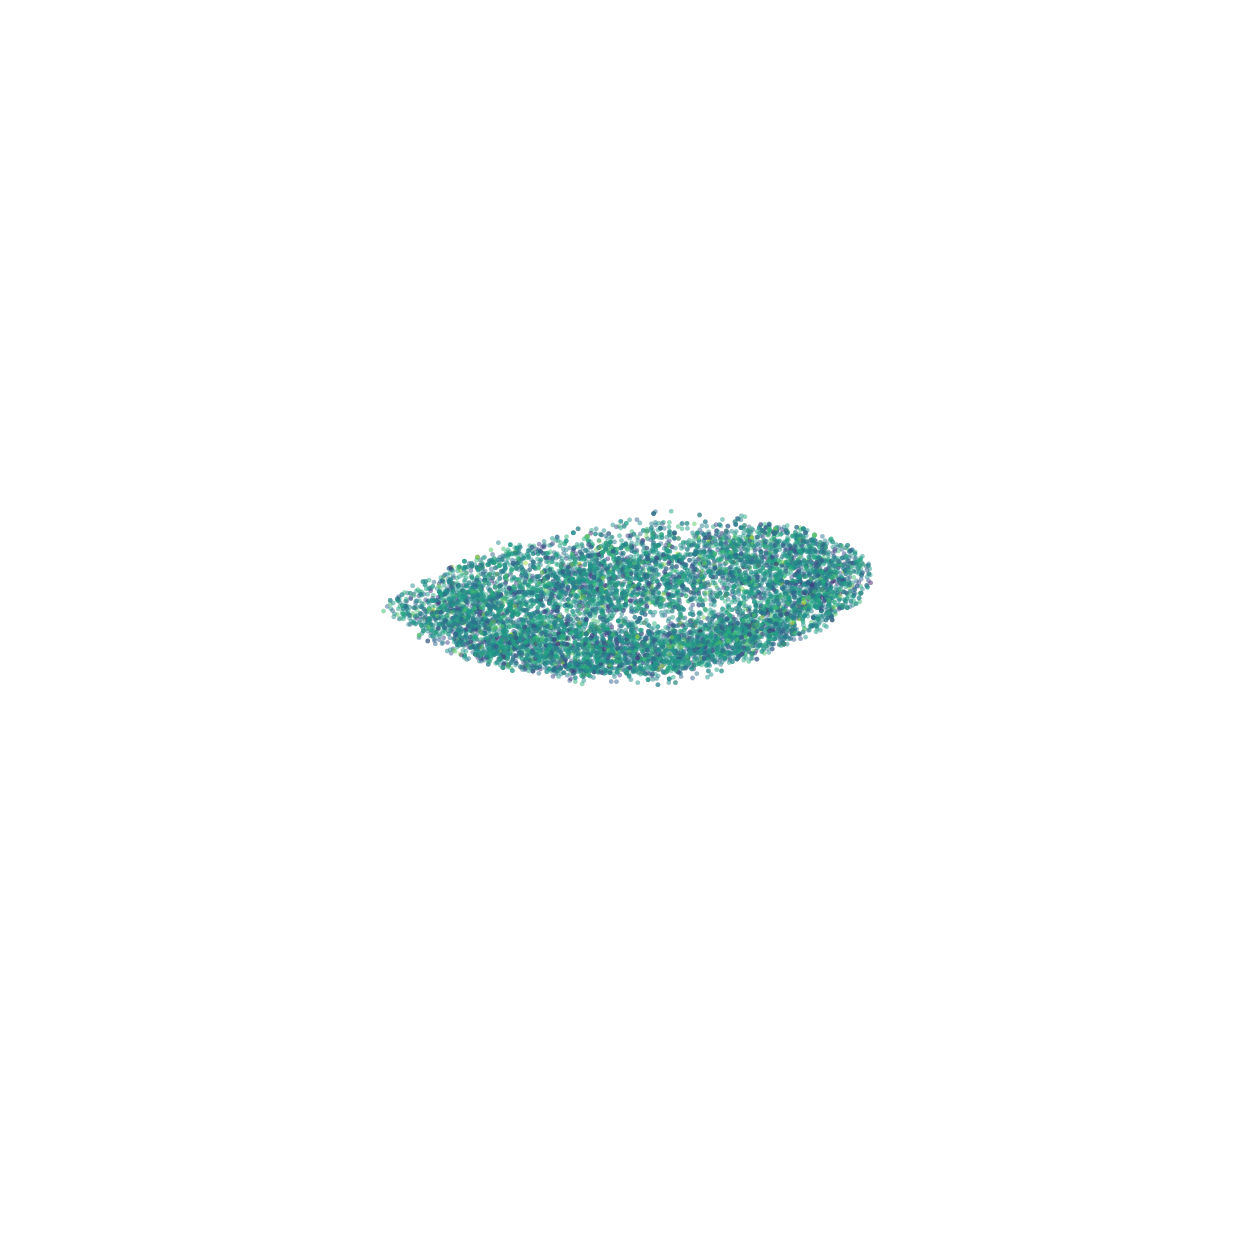

In [58]:
# %matplotlib widget
%matplotlib inline
spatial_key="tdr_spatial"
key_added="align_spatial"
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = -60
azim = 90
s = 20
limit = 400
xmin, xmax = -limit,limit
ymin,ymax = -limit,limit
zmin,zmax = -limit,limit
# cell_type_plot=slice_A_sub.obs['Annotation_2_tissue'].cat.categories[0]
# cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(30,50),facecolor='white')
ax = fig.add_subplot(2,1,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
ax.scatter(align_model_B.obsm[key_added][:,0],align_model_B.obsm[key_added][:,1],align_model_B.obsm[key_added][:,2],alpha=0.5,c=curl[0,:])
# ax.quiver(align_model_B.obsm[key_added][:,0],align_model_B.obsm[key_added][:,1],align_model_B.obsm[key_added][:,2],target_velocities[:,0],target_velocities[:,1],target_velocities[:,2],color=slice_colors[1],length = 10, normalize=True)
# for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
#     if cell_type == cell_type_plot:
#         ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
#     else:
#         ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')


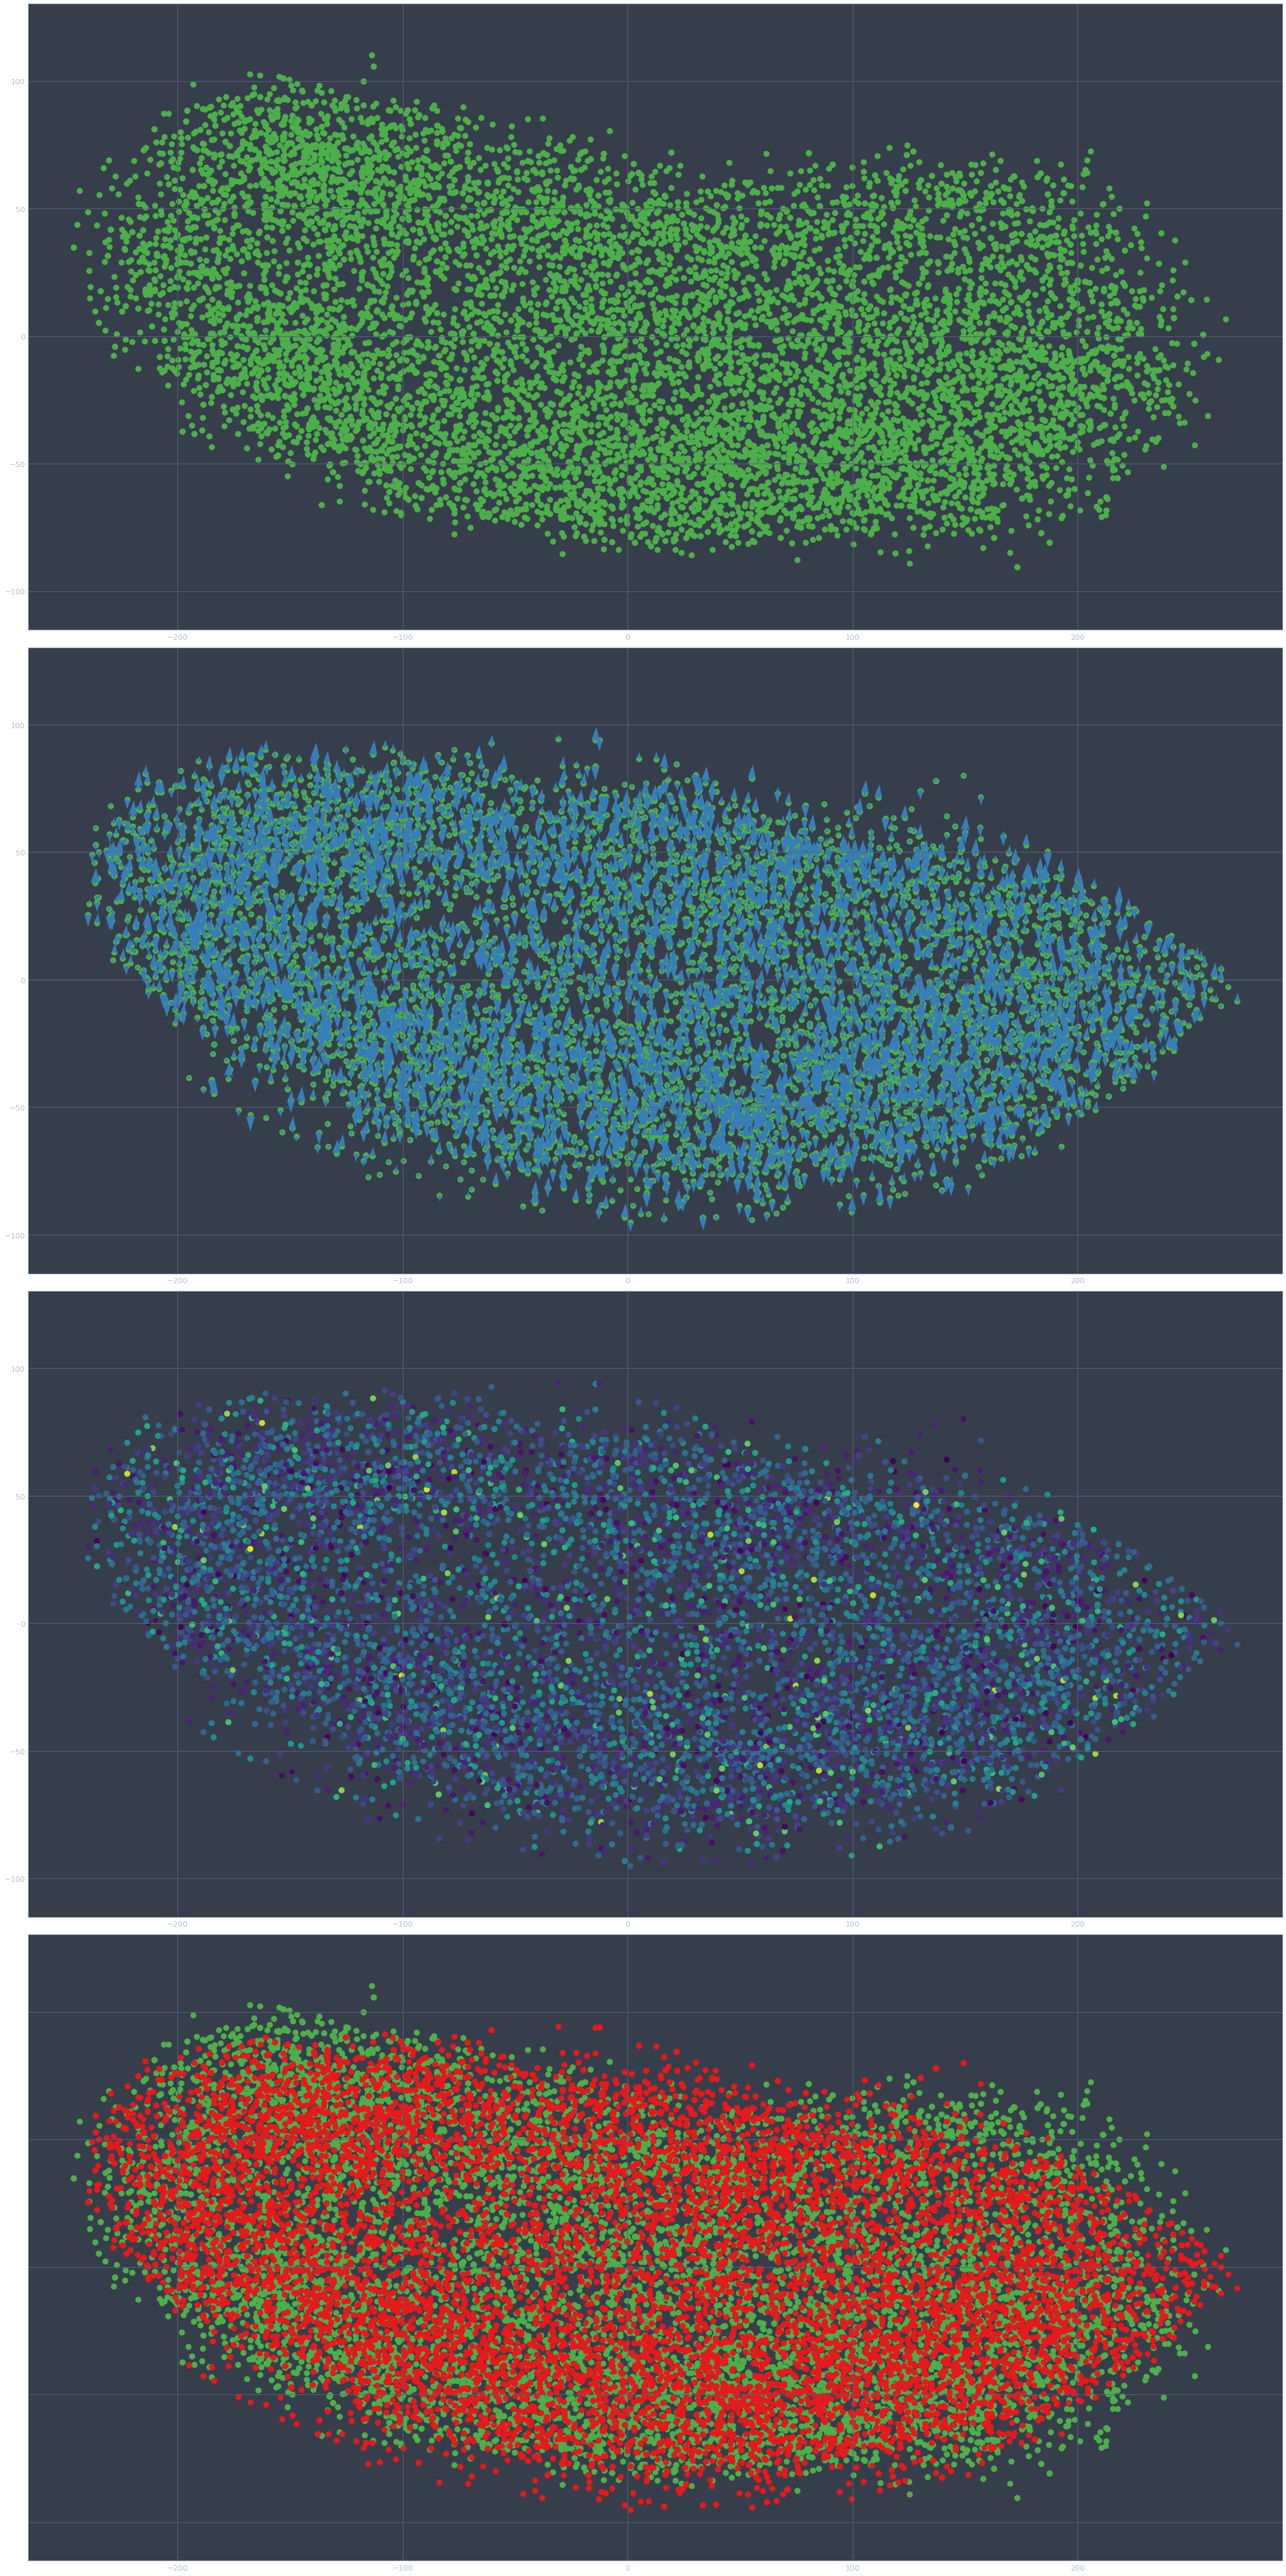

In [42]:
spatial_key = 'spatial'
key_added="align_spatial"
%matplotlib inline
xmin,xmax = np.min([np.min(align_model_B.obsm['align_spatial'][:,0]),np.min(align_model_A.obsm['align_spatial'][:,0])]),np.max([np.max(align_model_B.obsm['align_spatial'][:,0]),np.max(align_model_A.obsm['align_spatial'][:,0])])
ymin,ymax = np.min([np.min(align_model_B.obsm['align_spatial'][:,1]),np.min(align_model_A.obsm['align_spatial'][:,1])]),np.max([np.max(align_model_B.obsm['align_spatial'][:,1]),np.max(align_model_A.obsm['align_spatial'][:,1])])
dot_size = 100
margin = 20
scale=(ymax-ymin+2*margin)/(xmax-xmin+2*margin)
fig, axs = plt.subplots(4, 1,figsize=(30,15*4))
axs[0].scatter(align_model_A.obsm['align_spatial'][:,0],align_model_A.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
axs[0].set_xlim([xmin-margin,xmax+margin])
axs[0].set_ylim([ymin-margin,ymax+margin])
axs[1].scatter(align_model_B.obsm[key_added][:,0],align_model_B.obsm[key_added][:,1],s=dot_size,c=slice_colors[2])
axs[1].quiver(align_model_B.obsm[key_added][:,0],align_model_B.obsm[key_added][:,1],-target_velocities[:,0],-target_velocities[:,1],color=slice_colors[1],cmap='viridis')
axs[1].set_xlim([xmin-margin,xmax+margin])
axs[1].set_ylim([ymin-margin,ymax+margin])

axs[2].scatter(align_model_B.obsm[key_added][:,0],align_model_B.obsm[key_added][:,1],s=dot_size,c=acc_mat)
# axs[2].quiver(align_model_B.obsm[key_added][:,0],align_model_B.obsm[key_added][:,1],-target_velocities[:,0],-target_velocities[:,1],color=slice_colors[1])
axs[2].set_xlim([xmin-margin,xmax+margin])
axs[2].set_ylim([ymin-margin,ymax+margin])

# axs[0,1].set_yticklabels([])
axs[3].scatter(align_model_A.obsm['align_spatial'][:,0],align_model_A.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
axs[3].scatter(align_model_B.obsm['align_spatial'][:,0],align_model_B.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[0])
axs[3].set_xlim([xmin-margin,xmax+margin])
axs[3].set_ylim([ymin-margin,ymax+margin])
axs[3].set_yticklabels([])
plt.tight_layout()
plt.show()

In [43]:
# spatial_key = 'spatial'
# %matplotlib inline
# xmin,xmax = np.min([np.min(align_model_B.obsm['align_spatial'][:,0]),np.min(align_model_A.obsm['align_spatial'][:,0])]),np.max([np.max(align_model_B.obsm['align_spatial'][:,0]),np.max(align_model_A.obsm['align_spatial'][:,0])])
# ymin,ymax = np.min([np.min(align_model_B.obsm['align_spatial'][:,1]),np.min(align_model_A.obsm['align_spatial'][:,1])]),np.max([np.max(align_model_B.obsm['align_spatial'][:,1]),np.max(align_model_A.obsm['align_spatial'][:,1])])
# dot_size = 8
# margin = 20
# scale=(ymax-ymin+2*margin)/(xmax-xmin+2*margin)
# fig, axs = plt.subplots(2, 3,figsize=(30,20*scale))
# axs[0,0].scatter(align_model_A.obsm['align_spatial'][:,0],align_model_A.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
# axs[0,0].set_xlim([xmin-margin,xmax+margin])
# axs[0,0].set_ylim([ymin-margin,ymax+margin])
# axs[0,1].scatter(align_model_B.obsm[spatial_key][:,0],align_model_B.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[2])
# axs[0,1].quiver(align_model_B.obsm[spatial_key][:,0],align_model_B.obsm[spatial_key][:,1],target_velocities[:,0],target_velocities[:,1],color=slice_colors[2])
# axs[0,1].set_xlim([xmin-margin,xmax+margin])
# axs[0,1].set_ylim([ymin-margin,ymax+margin])
# # axs[0,1].set_yticklabels([])
# axs[0,2].scatter(align_model_A.obsm['align_spatial'][:,0],align_model_A.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
# axs[0,2].scatter(align_model_B.obsm['align_spatial'][:,0],align_model_B.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[0])
# axs[0,2].set_xlim([xmin-margin,xmax+margin])
# axs[0,2].set_ylim([ymin-margin,ymax+margin])
# axs[0,2].set_yticklabels([])

# axs[1,0].scatter(align_model_A.obsm['align_spatial'][:,0],align_model_A.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
# axs[1,0].set_xlim([xmin-margin,xmax+margin])
# axs[1,0].set_ylim([ymin-margin,ymax+margin])
# axs[1,1].scatter(align_model_B.obsm[spatial_key][:,0]+target_velocities[:,0],align_model_B.obsm[spatial_key][:,1]+target_velocities[:,1],s=dot_size,c=slice_colors[2])
# # axs[1,1].quiver(align_model_B.obsm[spatial_key][:,0],align_model_B.obsm[spatial_key][:,1],target_velocities[:,0],target_velocities[:,1],color=slice_colors[2],scale=1)
# axs[1,1].set_xlim([xmin-margin,xmax+margin])
# axs[1,1].set_ylim([ymin-margin,ymax+margin])
# axs[1,1].set_yticklabels([])
# axs[1,2].scatter(align_model_A.obsm['align_spatial'][:,0],align_model_A.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
# axs[1,2].scatter(align_model_B.obsm[spatial_key][:,0]+target_velocities[:,0],align_model_B.obsm[spatial_key][:,1]+target_velocities[:,1],s=dot_size,c=slice_colors[0])
# axs[1,2].set_xlim([xmin-margin,xmax+margin])
# axs[1,2].set_ylim([ymin-margin,ymax+margin])
# axs[1,2].set_yticklabels([])
# plt.tight_layout()
# plt.show()

In [44]:
# spatial_key = 'spatial'
# %matplotlib inline
# xmin,xmax = np.min([np.min(align_model_B.obsm['align_spatial'][:,0]),np.min(align_model_A.obsm['align_spatial'][:,0])]),np.max([np.max(align_model_B.obsm['align_spatial'][:,0]),np.max(align_model_A.obsm['align_spatial'][:,0])])
# ymin,ymax = np.min([np.min(align_model_B.obsm['align_spatial'][:,1]),np.min(align_model_A.obsm['align_spatial'][:,1])]),np.max([np.max(align_model_B.obsm['align_spatial'][:,1]),np.max(align_model_A.obsm['align_spatial'][:,1])])
# dot_size = 8
# margin = 20
# scale=(ymax-ymin+2*margin)/(xmax-xmin+2*margin)
# fig, axs = plt.subplots(2, 3,figsize=(30,20*scale))
# axs[0,0].scatter(align_model_A.obsm['align_spatial'][:,0],align_model_A.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
# axs[0,0].set_xlim([xmin-margin,xmax+margin])
# axs[0,0].set_ylim([ymin-margin,ymax+margin])
# axs[0,1].scatter(quary_points[:,0],quary_points[:,1],s=dot_size,c=slice_colors[2])
# axs[0,1].quiver(quary_points[:,0],quary_points[:,1],grid_velocities[:,0],grid_velocities[:,1],color=slice_colors[0])
# axs[0,1].set_xlim([xmin-margin,xmax+margin])
# axs[0,1].set_ylim([ymin-margin,ymax+margin])
# # axs[0,1].set_yticklabels([])
# axs[0,2].scatter(align_model_A.obsm['align_spatial'][:,0],align_model_A.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
# axs[0,2].scatter(align_model_B.obsm['align_spatial'][:,0],align_model_B.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[0])
# axs[0,2].set_xlim([xmin-margin,xmax+margin])
# axs[0,2].set_ylim([ymin-margin,ymax+margin])
# axs[0,2].set_yticklabels([])

# axs[1,0].scatter(align_model_A.obsm['align_spatial'][:,0],align_model_A.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
# axs[1,0].set_xlim([xmin-margin,xmax+margin])
# axs[1,0].set_ylim([ymin-margin,ymax+margin])
# axs[1,1].scatter(align_model_B.obsm[spatial_key][:,0]+target_velocities[:,0],align_model_B.obsm[spatial_key][:,1]+target_velocities[:,1],s=dot_size,c=slice_colors[2])
# # axs[1,1].quiver(align_model_B.obsm[spatial_key][:,0],align_model_B.obsm[spatial_key][:,1],target_velocities[:,0],target_velocities[:,1],color=slice_colors[2],scale=1)
# axs[1,1].set_xlim([xmin-margin,xmax+margin])
# axs[1,1].set_ylim([ymin-margin,ymax+margin])
# axs[1,1].set_yticklabels([])
# axs[1,2].scatter(align_model_A.obsm['align_spatial'][:,0],align_model_A.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
# axs[1,2].scatter(align_model_B.obsm[spatial_key][:,0]+target_velocities[:,0],align_model_B.obsm[spatial_key][:,1]+target_velocities[:,1],s=dot_size,c=slice_colors[0])
# axs[1,2].set_xlim([xmin-margin,xmax+margin])
# axs[1,2].set_ylim([ymin-margin,ymax+margin])
# axs[1,2].set_yticklabels([])
# plt.tight_layout()
# plt.show()